# Mesh

In [1]:
import matplotlib.pyplot as plt
import mikeio

## Read mesh file

In [2]:
msh = mikeio.Mesh("../data/odense_rough.mesh")
msh

<Mesh>
number of nodes: 399
number of elements: 654
projection: UTM-33

## Plot mesh

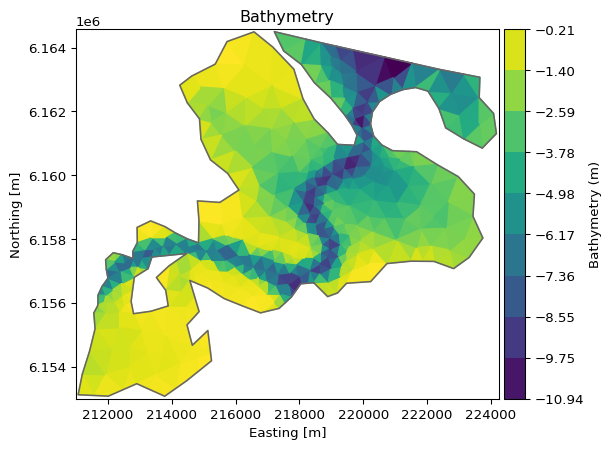

In [3]:
msh.plot()

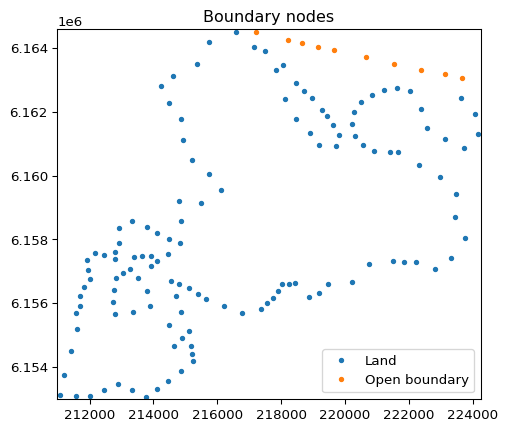

In [4]:
msh.plot.boundary_nodes(boundary_names=['Land','Open boundary']);

## Convert mesh to shapely

Convert mesh to
[shapely](https://shapely.readthedocs.io/en/latest/manual.html)
MultiPolygon object, requires that the `shapely` library is installed.

In [5]:
mp = msh.to_shapely()
mp

Now a lot of methods are available

In [6]:
mp.area

68931409.58160606

In [7]:
mp.bounds

(211068.501175313, 6153077.66681803, 224171.617336507, 6164499.42751662)

In [8]:
domain = mp.buffer(0)
domain

In [9]:
open_water = domain.buffer(-500)

coastalzone = domain - open_water
coastalzone

## Check if points are inside the domain

In [10]:
from shapely.geometry import Point

p1 = Point(216000, 6162000)
p2 = Point(220000, 6156000)
print(mp.contains(p1))
print(mp.contains(p2))

True
False

We can get similar functionality from the `.geometry` attribute of the
mesh object.

In [11]:
p1p2 = [[216000, 6162000], [220000, 6156000]]
msh.geometry.contains(p1p2)

array([ True, False])

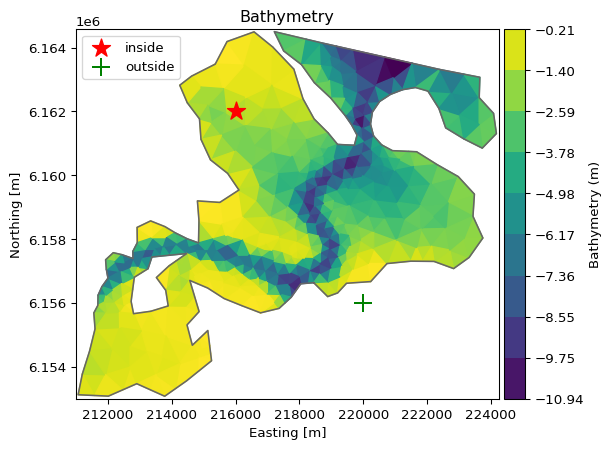

In [12]:
ax = msh.plot()
ax.scatter(p1.x, p1.y, marker="*", s=200, c="red", label="inside")
ax.scatter(p2.x, p2.y, marker="+", s=200, c="green", label="outside")
ax.legend();

## Change z values and boundary code

Assume that we want to have a minimum depth of 2 meters and change the
open boundary (code 2) to a closed one (code 1).

In [13]:
g = msh.geometry
print(f'max z before: {g.node_coordinates[:,2].max()}')
zc = g.node_coordinates[:,2]
zc[zc>-2] = -2
g.node_coordinates[:,2] = zc
print(f'max z after: {g.node_coordinates[:,2].max()}')

max z before: -0.200000002980232
max z after: -2.0

In [14]:
c = g.codes
c[c==2] = 1
g.codes = c

## Save the modfied geometry to a new mesh file

In [15]:
g.to_mesh("new_mesh.mesh")

Cleanup

In [16]:
import os

os.remove("new_mesh.mesh")